# Industry 4.0 의 중심, AI - ML&DL

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# Sect11. CNN (Convolutional Newural Network)

### 4. MNIST CNN Layers

In [1]:
import time
import os
import sys

# sys.path.insert(0, '.')
# sys.path.insert(0, '/c/Users/user/Dropbox/sect_tech/src_anaconda/B_DL_TensorFlow')


In [2]:
def chk_processting_time(start_time, end_time):
    process_time = end_time - start_time
    p_time = int(process_time)
    p_min = p_time // 60
    p_sec = p_time %  60
    print('처리시간 : {p_min}분 {p_sec}초 경과되었습니다.'.format(
            p_min = p_min, 
            p_sec = p_sec
        ))
    return process_time

### cnn_model4.py
> MNIST and Deep learning CNN

In [3]:
# 모델 최적화 설정
MODEL_DIR = './modules/'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)


In [4]:
%%writefile ./modules/cnn_model4.py

import tensorflow as tf
# import matplotlib.pyplot as plt
#
# from tensorflow.examples.tutorials.mnist import input_data
#
# tf.set_random_seed(777)  # reproducibility
#
# mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

class Model:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.training = tf.placeholder(tf.bool)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])

            # img 28x28x1 (black/white), Input Layer
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # Convolutional Layer #1
            conv1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            # Pooling Layer #1
            pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout1 = tf.layers.dropout(inputs=pool1,
                                         rate=0.7, training=self.training)

            # Convolutional Layer #2 and Pooling Layer #2
            conv2 = tf.layers.conv2d(inputs=dropout1,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                =64, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout2 = tf.layers.dropout(inputs=pool2,
                                         rate=0.7, training=self.training)

            # Convolutional Layer #2 and Pooling Layer #2
            conv3 = tf.layers.conv2d(inputs=dropout2, filters=128, kernel_size=[3, 3],
                                     padding="same", activation=tf.nn.relu)
            pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2],
                                            padding="same", strides=2)
            dropout3 = tf.layers.dropout(inputs=pool3,
                                         rate=0.7, training=self.training)

            # Dense Layer with Relu
            flat = tf.reshape(dropout3, [-1, 128 * 4 * 4])
            dense4 = tf.layers.dense(inputs=flat,
                                     units=625, activation=tf.nn.relu)
            dropout4 = tf.layers.dropout(inputs=dense4,
                                         rate=0.5, training=self.training)

            # Logits (no activation) Layer: L5 Final FC 625 inputs -> 10 outputs
            self.logits = tf.layers.dense(inputs=dropout4, units=10)

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits,
                             feed_dict={self.X: x_test, self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy,
                             feed_dict={self.X: x_test,
                                        self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.training: training})

# print('model4.Model Class Load !!')


Overwriting ./modules/cnn_model4.py


In [5]:
# Lab 11 MNIST and Deep learning CNN
from modules import cnn_model4 as model4
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset


C:\Python\Anaconda3-50\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### Training

In [6]:
# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# initialize
sess = tf.Session()
m4 = model4.Model(sess, "m4")

sess.run(tf.global_variables_initializer())

print('Learning Started!')
time1 = time.time()

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m4.train(batch_xs, batch_ys)
        avg_cost += c / total_batch
        
    time2 = time.time()
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost), 'p_time:', time2-time1)

print('Learning Finished!')
time2 = time.time()
chk_processting_time(time1, time2)


Learning Started!
Epoch: 0001 cost = 0.827114424 p_time: 120.19809865951538
Epoch: 0002 cost = 0.287922283 p_time: 244.21129608154297
Epoch: 0003 cost = 0.228357526 p_time: 368.4859833717346
Epoch: 0004 cost = 0.197257151 p_time: 493.3988928794861
Epoch: 0005 cost = 0.180166356 p_time: 618.0285711288452
Epoch: 0006 cost = 0.171087715 p_time: 742.6798498630524
Epoch: 0007 cost = 0.159188854 p_time: 869.5012059211731
Epoch: 0008 cost = 0.150339237 p_time: 992.7037465572357
Epoch: 0009 cost = 0.147921488 p_time: 1115.9887702465057
Epoch: 0010 cost = 0.143391961 p_time: 1239.3066103458405
Epoch: 0011 cost = 0.142087703 p_time: 1363.075400352478
Epoch: 0012 cost = 0.141683149 p_time: 1486.5890836715698
Epoch: 0013 cost = 0.134051375 p_time: 1610.9108011722565
Epoch: 0014 cost = 0.136750245 p_time: 1734.5867352485657
Epoch: 0015 cost = 0.131371096 p_time: 1858.378621339798
Learning Finished!
처리시간 : 30분 58초 경과되었습니다.


1858.378621339798

### Evaluation

In [7]:
# Test model and check accuracy
print('Accuracy:', m4.get_accuracy(mnist.test.images, mnist.test.labels))

Accuracy: 0.9888


### Prediction

Label:  [0]
Prediction:  [[ 12.94199562  -8.35243797  -5.52753305  -5.48553371  -7.28008652
   -3.01264286   0.30268472  -3.0741806   -2.25814199  -0.23367217]]


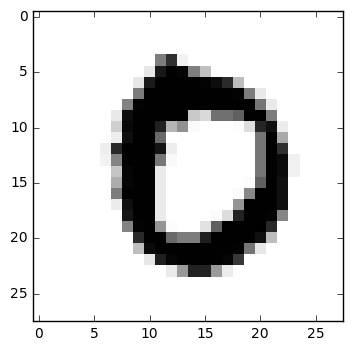

In [8]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", m4.predict(mnist.test.images[r:r + 1]))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>